In [1]:
import random

In [2]:
random.randint(-90,90)

68

In [3]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

# Import the requests library.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Print the coordinates of the cities.
coordinates = list(lat_lngs)
#print(coordinates)

In [6]:
# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
nouadhibou mr
bengkulu id
barentsburg sj
leh in
amderma ru
atuona pf
arraial do cabo br
mindelo cv
new norfolk au
port alfred za
thompson ca
kaitangata nz
kolondieba ml
verkhnyaya balkariya ru
illoqqortoormiut gl
redondela es
saint-philippe re
ushuaia ar
vaini to
maldonado uy
amderma ru
bluff nz
amderma ru
mataura pf
upernavik gl
kapaa us
qaanaaq gl
mporokoso zm
taolanaro mg
alofi nu
albany au
bambous virieux mu
pasewalk de
deputatskiy ru
acajutla sv
taolanaro mg
punta arenas cl
chuy uy
raudeberg no
mataura pf
bambous virieux mu
pochutla mx
thompson ca
yenagoa ng
astoria us
tiksi ru
mehamn no
mataura pf
hithadhoo mv
jamestown sh
balotra in
taolanaro mg
tasiilaq gl
hilo us
kapaa us
ponta do sol cv
katsuura jp
port alfred za
rock springs us
hobart au
mataura pf
tetouan ma
hobart au
torbay ca
ust-maya ru
poso id
hithadhoo mv
castro cl
albany au
collie au
iqaluit ca
nurobod uz
illoqqortoormiut gl
bindura zw
east london za
chuy uy
chuy uy
mataura pf
ilulissat gl
rio gallegos ar

kruisfontein za
san policarpo ph
severo-kurilsk ru
port alfred za
leningradskiy ru
kavieng pg
grindavik is
rikitea pf
amderma ru
mar del plata ar
ribeira grande pt
wulanhaote cn
trairi br
ostrovnoy ru
punta arenas cl
ponta do sol cv
palmer us
bluff nz
sola vu
lompoc us
marcona pe
albany au
grindavik is
barentsburg sj
lebu cl
provideniya ru
hobart au
poum nc
srednekolymsk ru
tingo maria pe
puerto ayora ec
samusu ws
saskylakh ru
bodden town ky
tumannyy ru
san rafael del sur ni
malwan in
turayf sa
saskylakh ru
vila velha br
san cristobal ec
kaabong ug
haines junction ca
ponta do sol cv
shujalpur in
san cristobal ec
busselton au
bredasdorp za
hilo us
saint-pierre pm
mahebourg mu
dikson ru
el real de santa maria pa
lorengau pg
yellowknife ca
sao filipe cv
methoni gr
shingu jp
piacabucu br
ambon id
butaritari ki
barrow us
bonthe sl
kalmunai lk
neryungri ru
samarai pg
busselton au
saint-philippe re
achisay kz
vuktyl ru
nanortalik gl
bilibino ru
amderma ru
hue vn
mvuma zw
bluff nz
carnarvon au

luderitz na
nikolskoye ru
khatanga ru
esperance au
souillac mu
port elizabeth za
jamestown sh
rikitea pf
mahebourg mu
hofn is
tuktoyaktuk ca
vostok ru
puerto ayora ec
salym ru
nha trang vn
taolanaro mg
kapaa us
ushuaia ar
dunedin nz
zyryanka ru
san policarpo ph
avarua ck
canutama br
cabo san lucas mx
busselton au
puerto ayora ec
dikson ru
bredasdorp za
barentsburg sj
castro cl
yumen cn
cape town za
geraldton au
shimoda jp
airai pw
rikitea pf
ankazoabo mg
barentsburg sj
saskylakh ru
mataura pf
zonguldak tr
longyearbyen sj
kapaa us
kapaa us
sitka us
busselton au
avarua ck
hermanus za
nome us
hamilton bm
norman wells ca
aldan ru
baykit ru
westport ie
balakirevo ru
rikitea pf
bambous virieux mu
butaritari ki
dikson ru
linares mx
jamestown sh
pisco pe
carnarvon au
bengkulu id
mount gambier au
tarudant ma
yellowknife ca
vila franca do campo pt
new norfolk au
port alfred za
rikitea pf
katsuura jp
hermanus za
aksarka ru
kapit my
road town vg
lebu cl
albany au
tuktoyaktuk ca
codrington ag
bambo

In [8]:
# Create a list for holding the cities. All cities will be retained on "cities"
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [9]:
import requests
requests.__version__

'2.24.0'

In [10]:
# Import the API key.
from config import weather_api_key
weather_api_key

'f8e0c6b3a91b558ace7bc49dd942419a'

In [11]:
# 6.2.2 Getting Started with API. Starting URL for Weather Map API Call.
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8e0c6b3a91b558ace7bc49dd942419a


In [12]:
# Create an endpoint URL for a city. For example city = 'Boston'
#city = 'Boston'
#city_url = url + "&q=" + city
#print(city_url)

In [13]:
# 6.2.3 Make an API call. Make a 'Get' request for the city weather.
#city_weather = requests.get(city_url)
#city_json = city_weather.json()
#city_json.keys()

In [14]:
#city_json.get('main')

In [15]:
# Get the text of the 'Get' request.
#city_weather.text

In [16]:
# Get the JSON of the 'Get' request.
#city_weather.json

In [17]:
# 6.2.4 Handle request errors. Retrieve a Response Using the get() Method. Create an endpoint URL for a city.
#city = "Boston"
#city_url = url + "&q=" + city
#city_weather = requests.get(city_url)
#if city_weather.status_code == 200:
#    print(f"City Weather found.")
#else:
#    print(f"City weather not found.")

In [18]:
# 6.2.5 Get data from a response. Create an endpoint URL for a city. The output for this code is City weather found.
# With JSON method is a lot easier to see the overall structure of the data
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)
#city_weather.json()

In [19]:
# 6.2.5 Get the JSON data.
#boston_data = city_weather.json()

In [20]:
#boston_data['sys']

In [21]:
# 6.2.5 Get the country for Boston
#boston_data['sys']['country']

In [22]:
# 6.2.5 Get the latitude for Boston
#boston_data['coord']['lat']

In [23]:
# 6.2.5 Get the maximum temperature
#boston_data['main']['temp_max']

In [24]:
#lat = boston_data["coord"]["lat"]
#lng = boston_data["coord"]["lon"]
#max_temp = boston_data["main"]["temp_max"]
#humidity = boston_data["main"]["humidity"]
#clouds = boston_data["clouds"]["all"]
#wind = boston_data["wind"]["speed"]
#print(lat, lng, max_temp, humidity, clouds, wind)

In [25]:
# 6.2.5 Convert the Data Timestamp. 
# Import the datetime module from the datetime library.
#from datetime import datetime
# Get the date from the JSON file.
#date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds. strftime('%Y-%m-%d %H:%M:%S')
#datetime.utcfromtimestamp(date)

In [26]:
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [27]:
# 6.2.6 Get the City Weather Data. Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# 6.2.6 Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# 6.2.6 Loop through all the cities in our list. And Build the Cuty URL

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# 6.2.6 Handle API Request Errors with try-except Blocks
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("Something went wrong on city: " + city)
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
Something went wrong on city: taolanaro
Processing Record 2 of Set 1 | nouadhibou
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | barentsburg
Something went wrong on city: barentsburg
Processing Record 5 of Set 1 | leh
Processing Record 6 of Set 1 | amderma
Something went wrong on city: amderma
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | mindelo
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | kolondieba
Processing Record 15 of Set 1 | verkhnyaya balkariya
Processing Record 16 of Set 1 | illoqqortoormiut
Something went wrong on city: illoqqortoormiut
Processing Record 17 of Set 1 | redondela
Processing Record 18 of Set 1 | saint-philippe
Pro

Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | mahon
Processing Record 40 of Set 4 | hennenman
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | pevek
Processing Record 44 of Set 4 | mys shmidta
Something went wrong on city: mys shmidta
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | umzimvubu
Something went wrong on city: umzimvubu
Processing Record 49 of Set 4 | bonito
Processing Record 50 of Set 4 | bahia honda
Processing Record 1 of Set 5 | moerai
Processing Record 2 of Set 5 | ipixuna
Processing Record 3 of Set 5 | wuwei
Processing Record 4 of Set 5 | surandai
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | roma
Processing Record 8 of Set 

Processing Record 22 of Set 8 | san rafael del sur
Processing Record 23 of Set 8 | malwan
Something went wrong on city: malwan
Processing Record 24 of Set 8 | san cristobal
Processing Record 25 of Set 8 | kaabong
Processing Record 26 of Set 8 | shujalpur
Processing Record 27 of Set 8 | el real de santa maria
Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | methoni
Processing Record 30 of Set 8 | shingu
Processing Record 31 of Set 8 | piacabucu
Processing Record 32 of Set 8 | kalmunai
Processing Record 33 of Set 8 | neryungri
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | achisay
Something went wrong on city: achisay
Processing Record 36 of Set 8 | vuktyl
Processing Record 37 of Set 8 | hue
Processing Record 38 of Set 8 | mvuma
Processing Record 39 of Set 8 | owo
Processing Record 40 of Set 8 | coalcoman
Something went wrong on city: coalcoman
Processing Record 41 of Set 8 | vaitupu
Something went wrong on city: vaitupu
Processing Record 

Processing Record 7 of Set 12 | rosario
Processing Record 8 of Set 12 | ternate
Processing Record 9 of Set 12 | ayorou
Processing Record 10 of Set 12 | fare
Processing Record 11 of Set 12 | panjab
Processing Record 12 of Set 12 | abeokuta
Processing Record 13 of Set 12 | warrington
Processing Record 14 of Set 12 | celestun
Processing Record 15 of Set 12 | khor
Processing Record 16 of Set 12 | ngukurr
Something went wrong on city: ngukurr
Processing Record 17 of Set 12 | niamey
Processing Record 18 of Set 12 | pringsewu
Processing Record 19 of Set 12 | rujiena
Processing Record 20 of Set 12 | miraflores
Processing Record 21 of Set 12 | mukhen
Processing Record 22 of Set 12 | eureka
Processing Record 23 of Set 12 | okha
Processing Record 24 of Set 12 | jacqueville
Processing Record 25 of Set 12 | haflong
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | nanakuli
Processing Record 28 of Set 12 | mackay
Processing Record 29 of Set 12 | kathu
Processing Record 30 

In [29]:
# 6.2.7 Create a DataFrame of City Data Weather and Print(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,71.60,56,4,21.85,MR,2021-01-09 16:34:09
1,Bengkulu,-3.8004,102.2655,75.47,88,100,5.39,ID,2021-01-09 16:34:09
2,Leh,34.1667,77.5833,4.17,61,0,1.03,IN,2021-01-09 16:30:26
3,Atuona,-9.8000,-139.0333,77.95,71,90,20.15,PF,2021-01-09 16:34:09
4,Arraial Do Cabo,-22.9661,-42.0278,87.80,66,40,9.22,BR,2021-01-09 16:34:09
5,Mindelo,16.8901,-24.9804,77.00,50,40,26.46,CV,2021-01-09 16:34:09
6,New Norfolk,-42.7826,147.0587,57.99,69,66,2.80,AU,2021-01-09 16:34:09
7,Port Alfred,-33.5906,26.8910,78.01,85,0,5.99,ZA,2021-01-09 16:34:10
8,Thompson,55.7435,-97.8558,-0.40,92,90,2.30,CA,2021-01-09 16:34:10
9,Kaitangata,-46.2817,169.8464,50.00,85,92,5.23,NZ,2021-01-09 16:34:10


In [30]:
# Lenght of City Data dictionary
len(city_data)

568

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,71.60,56,4,21.85,MR,2021-01-09 16:34:09
1,Bengkulu,-3.8004,102.2655,75.47,88,100,5.39,ID,2021-01-09 16:34:09
2,Leh,34.1667,77.5833,4.17,61,0,1.03,IN,2021-01-09 16:30:26
3,Atuona,-9.8000,-139.0333,77.95,71,90,20.15,PF,2021-01-09 16:34:09
4,Arraial Do Cabo,-22.9661,-42.0278,87.80,66,40,9.22,BR,2021-01-09 16:34:09


In [32]:
# 6.2.7 Reorder columns to a new array
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2021-01-09 16:34:09,20.9310,-17.0347,71.60,56,4,21.85
1,Bengkulu,ID,2021-01-09 16:34:09,-3.8004,102.2655,75.47,88,100,5.39
2,Leh,IN,2021-01-09 16:30:26,34.1667,77.5833,4.17,61,0,1.03
3,Atuona,PF,2021-01-09 16:34:09,-9.8000,-139.0333,77.95,71,90,20.15
4,Arraial Do Cabo,BR,2021-01-09 16:34:09,-22.9661,-42.0278,87.80,66,40,9.22


In [33]:
# 6.2.7 we'll create an output file to save the DataFrame as a CSV in a new folder for that file.
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

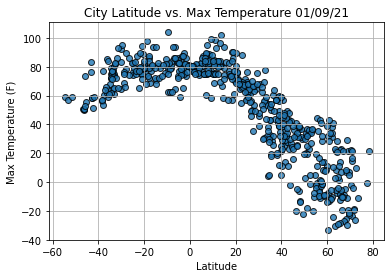

In [39]:
# 6.3.1 Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

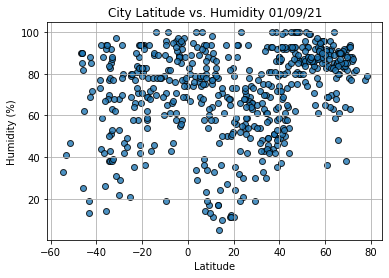

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

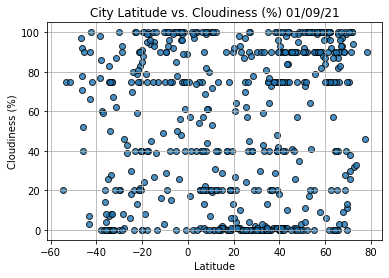

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
#Show plot.
plt.show()

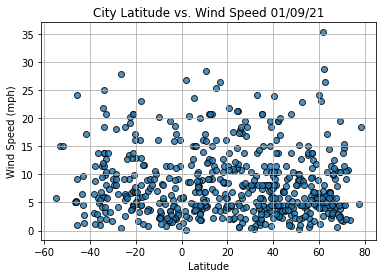

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The std_error is: {std_err:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011
The std_error is: 0.137


In [44]:
regress_values = [(lat * slope + intercept) for lat in lats]

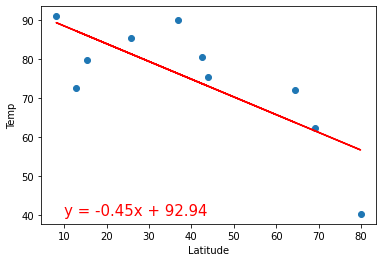

In [45]:
# 6.4.1 Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [46]:
# index13 = city_data_df.loc[13]. Data from row 13
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2021-01-09 16:34:10
Lat                      -21.3585
Lng                       55.7679
Max Temp                     78.8
Humidity                       83
Cloudiness                     20
Wind Speed                  20.71
Name: 13, dtype: object

In [47]:
# DataFrame based on all Northern Hemisphere lattitudes
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
563    False
564    False
565    False
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [48]:
# First 5 rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2021-01-09 16:34:09,20.9310,-17.0347,71.60,56,4,21.85
2,Leh,IN,2021-01-09 16:30:26,34.1667,77.5833,4.17,61,0,1.03
5,Mindelo,CV,2021-01-09 16:34:09,16.8901,-24.9804,77.00,50,40,26.46
8,Thompson,CA,2021-01-09 16:34:10,55.7435,-97.8558,-0.40,92,90,2.30
10,Kolondieba,ML,2021-01-09 16:34:10,11.0882,-6.8926,98.49,11,0,4.29


In [49]:
# 6.4.2 Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [50]:
# Create Northern and Southern Hemispheres' DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

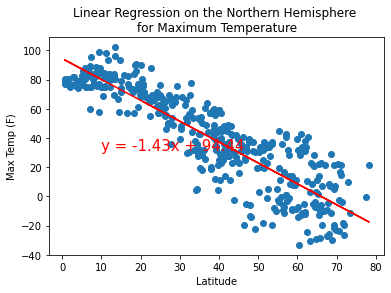

In [51]:
# 6.4.2 Import linregress
from scipy.stats import linregress
# Import Matplotlib.
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", "Max Temp (F)", (10, 32))

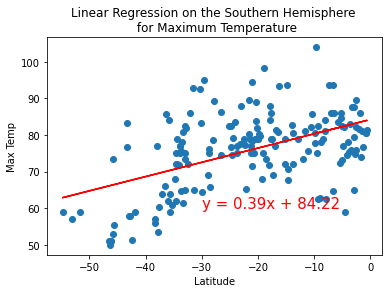

In [52]:
# 6.4.2 Import linregress
from scipy.stats import linregress
# Import Matplotlib.
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,60))

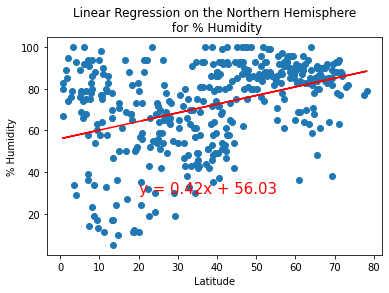

In [53]:
# 6.4.3 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(20,30))

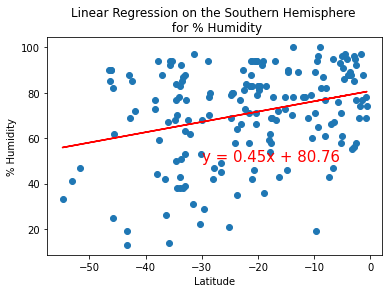

In [54]:
# 6.4.3 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,50))

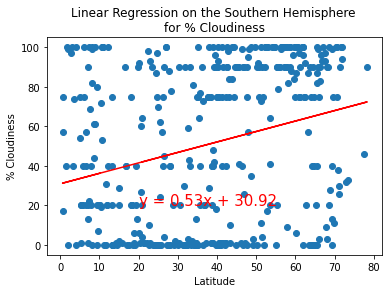

In [55]:
# 6.4.4 Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(20,20))

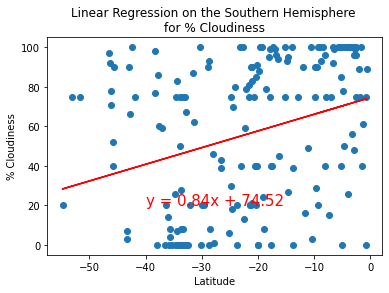

In [56]:
# 6.4.4 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-40,20))

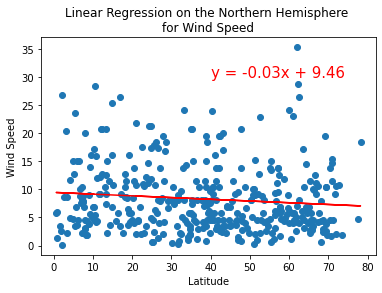

In [57]:
# 6.4.5 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed','Wind Speed',(40,30))